# Importing Library

In [2]:
#Loading Libraries

import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os, random
import cv2
from glob import glob
import sklearn
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img
from keras.utils.np_utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dropout, Dense, Flatten, BatchNormalization, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing import image
from sklearn.metrics import accuracy_score, classification_report
from pathlib import Path
from PIL import Image 

# /Volumes/DATAMAC/notebook/Sudoku/Sudoku-Hero/digits/Digits

# Loading Data

In [3]:
# loading data
data = os.listdir('/Volumes/DATAMAC/notebook/Sudoku/Sudoku-Hero/digits/Digits')
data_X = []
data_y = []
data_class = len(data)
for i in range(0, data_class):
    data_list = os.listdir('/Volumes/DATAMAC/notebook/Sudoku/Sudoku-Hero/digits/Digits/' + "/"+str(i))
    for j in data_list:
        pic = cv2.imread('/Volumes/DATAMAC/notebook/Sudoku/Sudoku-Hero/digits/Digits/' + "/"+str(i)+"/"+j)
        pic = cv2.resize(pic, (32, 32))
        data_X.append(pic)
        data_y.append(i)

if len(data_X) == len(data_y):
    print("Total Datapotins: ", len(data_X))

# labels and image
data_X = np.array(data_X)
data_y = np.array(data_y)

Total Datapotins:  10160


# Spliting Dataset

In [5]:
# Splitting the train validation and test data
X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.05)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2)
print("Train data: ", X_train.shape)
print("Validation data: ", X_val.shape)
print("Test data: ", X_test.shape)


Train data:  (7721, 32, 32, 3)
Validation data:  (1931, 32, 32, 3)
Test data:  (508, 32, 32, 3)


In [6]:
# preprocessing the images for neural network

def Prep(img):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.equalizeHist(img)
    img = img/255
    return img

X_train = np.array(list(map(Prep, X_train)))
X_val = np.array(list(map(Prep, X_val)))
X_test = np.array(list(map(Prep, X_test)))

# Reshaping the images
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2], 1)
X_val = X_val.reshape(X_val.shape[0], X_val.shape[1], X_val.shape[2], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2], 1)

# augmenting the images
datagen = ImageDataGenerator(width_shift_range=0.1, height_shift_range=0.1, zoom_range=0.2, shear_range=0.1, rotation_range=10)
datagen.fit(X_train)

In [7]:
# One hot encoding of the labels
y_train = to_categorical(y_train, data_class)
y_val = to_categorical(y_val, data_class)
y_test = to_categorical(y_test, data_class)

# Model Building

In [9]:
# creating the model

model = Sequential()

model.add((Conv2D(60, (5, 5), input_shape=(32, 32, 1), activation='relu', padding='same')))
model.add((Conv2D(60, (5, 5), activation='relu', padding='same')))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add((Conv2D(30, (3, 3), activation='relu', padding='same')))
model.add((Conv2D(30, (3, 3), activation='relu', padding='same')))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.5))

model.add(Flatten())
model.add(Dense(500, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 32, 32, 60)        1560      
                                                                 
 conv2d_2 (Conv2D)           (None, 32, 32, 60)        90060     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 60)       0         
 )                                                               
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 30)        16230     
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 30)        8130      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 30)         0         
 2D)                                                  

In [11]:
# compiling the model
optimizer = RMSprop(learning_rate=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

# fitting the model
history = model.fit(datagen.flow(X_train, y_train, 
                                batch_size=32), 
                                epochs=10, 
                                validation_data=(X_val, y_val), 
                                verbose=2,
                                steps_per_epoch=200)

Epoch 1/10
200/200 - 66s - loss: 0.3016 - accuracy: 0.9058 - val_loss: 0.0596 - val_accuracy: 0.9845 - 66s/epoch - 331ms/step
Epoch 2/10
200/200 - 66s - loss: 0.2004 - accuracy: 0.9387 - val_loss: 0.0343 - val_accuracy: 0.9896 - 66s/epoch - 329ms/step
Epoch 3/10
200/200 - 62s - loss: 0.1544 - accuracy: 0.9550 - val_loss: 0.0368 - val_accuracy: 0.9876 - 62s/epoch - 312ms/step
Epoch 4/10
200/200 - 62s - loss: 0.1318 - accuracy: 0.9569 - val_loss: 0.0221 - val_accuracy: 0.9938 - 62s/epoch - 311ms/step
Epoch 5/10
200/200 - 71s - loss: 0.1241 - accuracy: 0.9636 - val_loss: 0.0432 - val_accuracy: 0.9855 - 71s/epoch - 353ms/step
Epoch 6/10
200/200 - 77s - loss: 0.1196 - accuracy: 0.9650 - val_loss: 0.0165 - val_accuracy: 0.9964 - 77s/epoch - 387ms/step
Epoch 7/10
200/200 - 95s - loss: 0.1044 - accuracy: 0.9675 - val_loss: 0.0165 - val_accuracy: 0.9959 - 95s/epoch - 473ms/step
Epoch 8/10
200/200 - 70s - loss: 0.1023 - accuracy: 0.9663 - val_loss: 0.0319 - val_accuracy: 0.9902 - 70s/epoch - 348

In [12]:
# testing the model
score = model.evaluate(X_test, y_test, verbose=0)
print('Test Score: ', score[0])
print('Test Accuracy: ', score[1])


Test Score:  0.008476442657411098
Test Accuracy:  0.9960629940032959


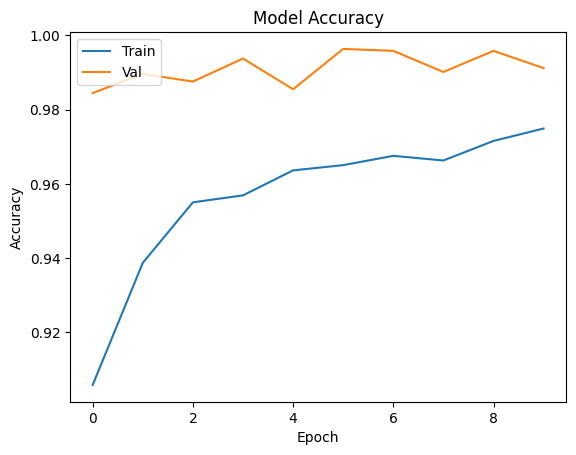

In [13]:
# save the model
model.save('model.h5')

# plot the accuracy and loss
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Reading Sudoku Puzzer

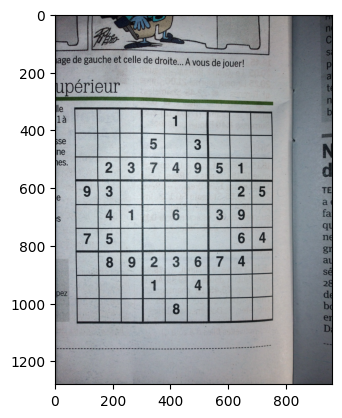

In [14]:
# randomly select an image from dataset

folder = '/Volumes/DATAMAC/notebook/Sudoku/Sudoku-Hero/datasetsudoku'
a = random.choice(os.listdir(folder))
img = cv2.imread(folder + "/" + a)
plt.figure()
plt.imshow(img)
plt.show()

# Contour Detection

# Split Cells

# Solving